# Introducción a Deep Learning

En este taller se dará una introducción a cómo funcionan las redes neuronales. Utilizaremos ```Keras```, una librería que hace fácil manipular redes neuronales utilizando Tensorflow, la librería más utilizada para Machine Learning.

Corre ```conda install keras``` para instalar Keras.

Implementaremos un multi-layer perceptron (red neuronal) que pueda identificar dígitos escritos a mano. Dado que es un problema muy común, ya existe un dataset de 60,000 imágenes de dígitos, llamada [MNIST](http://yann.lecun.com/exdb/mnist/). Este es un excelente caso para aprender a utilizar redes neuronales en casos reales. [Keras](https://keras.io/) funciona como un API (o librería) de nivel más alto. Esto hará más fácil y rápido el desarrollo.

In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

## Comprendiendo la información

Cualquier uso de Deep Learning requiere el manejo de información. Es decir, vamos a entrenar una red neuronal con training data. Antes de poder saltar a este paso, primero se debe entender cómo es el input. No es lo mismo recibir una imagen a color que una imagen en blanco y negro.

Por suerte, Keras ya viene con las utilidades necesarias para descargar MNIST, lo cuál hace más rápido el trabajo. En la siguiente celda descargamos las imágenes y las dividimos en training y testing sets.

In [67]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
print(x_train.shape)
print(x_test.shape)
x_train[0]

(60000, 28, 28)
(10000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Preprocesamos la información
Una red neuronal normal no puede recibir matrices como entrada, sólo vectores. Por lo tanto, convertiremos la lista de listas (matriz) en una lista completa.

In [69]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [70]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [71]:
x_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

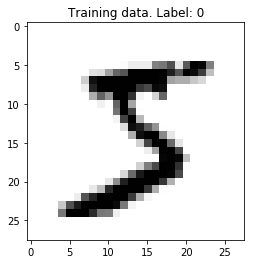

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    image = x_train[index].reshape([28,28])
    plt.title('Training data. Label: {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
show_digit(0)

In [73]:
y_train[0]

5

A los vectores les aplicamos [one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), una técnica importante para que las redes neuronales puedan utilizarlo. 

Usamos https://keras.io/utils/#to_categorical

In [74]:
# Has el one hot encoding para que 5 se convierta en [0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

En nuestro valor de X, tenemos la entrada, la cuál es la representación de la imagen como vector. En nuestro valor de Y, tenemos el dígito (0 a 9). Dado que manejamos one hot encoding, lo representamos como un vector de 10 elementos. Es importante tener esto en cuenta cuando diseñemos nuestra red neuronal. 

## Construimos arquitectura de red neuronal

Para el entrenamiento utilizaremos 60,000 imágenes. Para hacer el testing utilizaremos 10,000 imágenes. ¿Cuál es la diferencia?

El proceso de entrenamiento es el siguiente para cada imagen.

* La imagen pasa por la red neuronal. (Feedforward)
* La red neuronal predice qué número es.
* Como estamos en entrenamiento, tenemos el valor de Y (el dígito verdadero).
* En base a esto, utilizando un proceso llamado backpropagation, la red neuronal adaptará sus pesos. Usamos Gradient Descent en este paso.
* Este proceso lo repetiremos para las 60,000 imágenes. Todo esto ocurre en un epoch. Dependiendo el tipo de problema, queremos que todo nuestro testing set pase varias veces. Para los problemas sencillos, entre 10 y 200 epochs suele ser más que suficiente.

* Así que, si tenemos 60,000 imágenes y queremos entrenar nuestra red neuronal en 10 epochs, estaremos hablando de pasar 600,000 imágenes a la red neuronal. Con razón recién es un área que ha empezado a ganar popularidad en los últimos años.

In [84]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Entrenamos el modelo

In [86]:
model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 1.3659 - acc: 0.6359 - val_loss: 0.6606 - val_acc: 0.8401
Epoch 2/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.5315 - acc: 0.8601 - val_loss: 0.4242 - val_acc: 0.8856
Epoch 3/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.4034 - acc: 0.8875 - val_loss: 0.3566 - val_acc: 0.8985
Epoch 4/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.3526 - acc: 0.9000 - val_loss: 0.3216 - val_acc: 0.9089
Epoch 5/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.3224 - acc: 0.9074 - val_loss: 0.2999 - val_acc: 0.9133
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.3004 - acc: 0.9132 - val_loss: 0.2807 - val_acc: 0.9194
Epoch 7/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2829 - acc: 0.9183 - val_loss: 0.2674 - 

60000/60000 [==============================] - 3s 45us/step - loss: 0.0742 - acc: 0.9797 - val_loss: 0.0961 - val_acc: 0.9704
Epoch 60/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0730 - acc: 0.9800 - val_loss: 0.0971 - val_acc: 0.9714
Epoch 61/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0718 - acc: 0.9805 - val_loss: 0.0954 - val_acc: 0.9708
Epoch 62/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0707 - acc: 0.9810 - val_loss: 0.0938 - val_acc: 0.9712
Epoch 63/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0695 - acc: 0.9811 - val_loss: 0.0926 - val_acc: 0.9719
Epoch 64/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0685 - acc: 0.9815 - val_loss: 0.0923 - val_acc: 0.9716
Epoch 65/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.0675 - acc: 0.9816 - val_loss: 0.0921 - val_acc: 0.9716
Epoch 66/100
60000/60000 [==============

## Evaluamos el modelo

In [87]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9763
